In [1]:
!pip3 install opencv-python keras tensorflow kagglehub

In [11]:
import kagglehub

import tensorflow as tf

import cv2 as cv
from google.colab.patches import cv2_imshow

import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
# from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.preprocessing import image

In [12]:
path = kagglehub.dataset_download("sadmansakibmahi/plant-disease-expert")

100%|██████████| 9.33G/9.33G [02:10<00:00, 76.5MB/s]

Extracting files...


In [13]:
import pathlib

print(path)

data_path = f'{path}/Image Data base/Image Data base/'

data_dir = pathlib.Path(data_path)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

/root/.cache/kagglehub/datasets/sadmansakibmahi/plant-disease-expert/versions/17
199665


In [14]:
# Define the path to the image folders
data_path = f'{path}/Image Data base/Image Data base/'

batch_size = 8
img_height = 224
img_width = 224

train_ds = keras.utils.image_dataset_from_directory(
    data_path,
    # labels='inferred',
    shuffle=True,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds  = keras.utils.image_dataset_from_directory(
    data_path,
    # labels='inferred',
    shuffle=True,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 199665 files belonging to 58 classes.
Using 159732 files for training.
Found 199665 files belonging to 58 classes.
Using 39933 files for validation.


['Apple Apple scab', 'Apple Black rot', 'Apple Cedar apple rust', 'Apple healthy', 'Bacterial leaf blight in rice leaf', 'Blight in corn Leaf', 'Blueberry healthy', 'Brown spot in rice leaf', 'Cercospora leaf spot', 'Cherry (including sour) Powdery mildew', 'Cherry (including_sour) healthy', 'Common Rust in corn Leaf', 'Corn (maize) healthy', 'Garlic', 'Grape Black rot', 'Grape Esca Black Measles', 'Grape Leaf blight Isariopsis Leaf Spot', 'Grape healthy', 'Gray Leaf Spot in corn Leaf', 'Leaf smut in rice leaf', 'Nitrogen deficiency in plant', 'Orange Haunglongbing Citrus greening', 'Peach healthy', 'Pepper bell Bacterial spot', 'Pepper bell healthy', 'Potato Early blight', 'Potato Late blight', 'Potato healthy', 'Raspberry healthy', 'Sogatella rice', 'Soybean healthy', 'Strawberry Leaf scorch', 'Strawberry healthy', 'Tomato Bacterial spot', 'Tomato Early blight', 'Tomato Late blight', 'Tomato Leaf Mold', 'Tomato Septoria leaf spot', 'Tomato Spider mites Two spotted spider mite', 'Toma

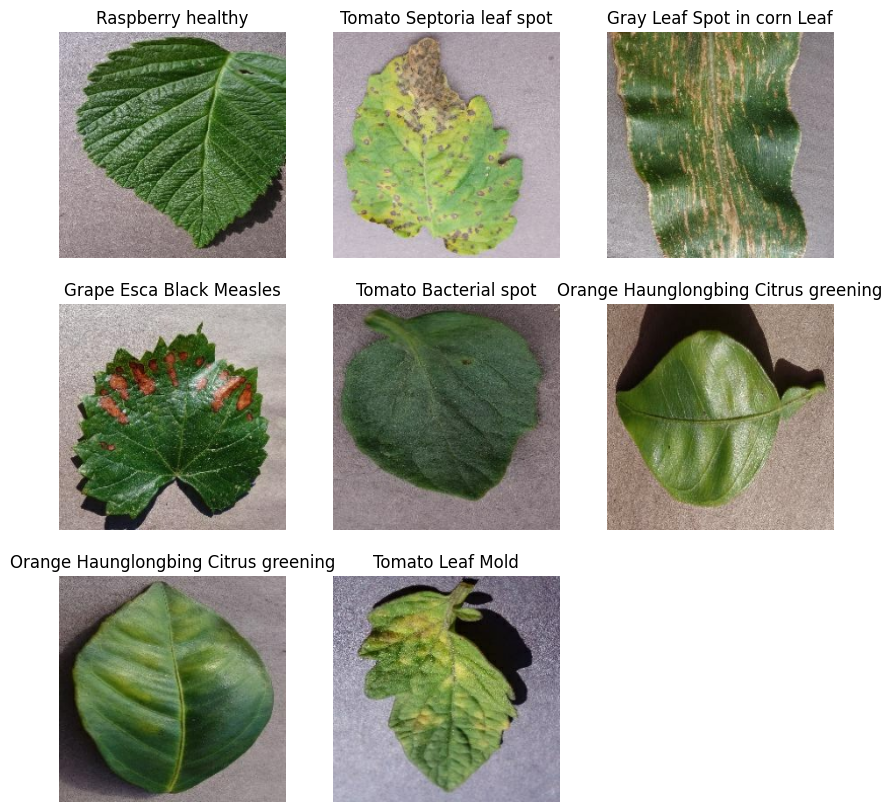

In [15]:
import matplotlib.pyplot as plt

class_names = train_ds.class_names
print(class_names)

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(8):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
loaded_model = tf.keras.models.load_model(
    "/content/my_model_22_12_1.keras", custom_objects=None, compile=True, safe_mode=True
)

loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 58)                  │          29,754 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,824,240 (102.33 MB)

 Trainable params: 1,078,842 (4.12 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 2,157,686 (8.23 MB)

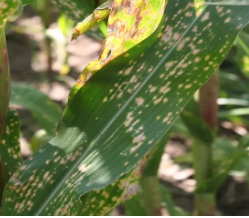

image shape:  (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
5
[8.09927201e-08 1.98441347e-13 9.98662941e-15 6.49208187e-11
 6.61486013e-08 6.34737611e-01 3.32300099e-09 3.82750642e-07
 9.07256759e-09 3.59978469e-09 1.62960953e-12 7.40011921e-04
 1.82521922e-04 3.22733333e-11 1.30063460e-11 6.31991237e-10
 1.90268591e-13 8.39274820e-18 3.64146829e-01 3.84204268e-09
 5.23664832e-16 1.97008070e-11 3.07025434e-18 1.56004461e-07
 2.79171175e-09 4.06305745e-08 1.26041267e-13 8.36209400e-12
 2.86237463e-15 2.77217051e-12 5.27838995e-10 1.46357920e-07
 4.07820289e-13 2.61382499e-10 8.03553402e-09 3.03128367e-08
 1.01953515e-11 8.44481534e-08 4.23412590e-11 5.53814286e-11
 8.56452748e-16 1.50043611e-09 8.83584816e-10 9.09813707e-07
 3.36358275e-09 1.40097101e-09 5.38362701e-06 4.81660578e-08
 1.84906050e-04 8.49696962e-12 3.82095910e-09 7.14150872e-07
 6.63623956e-09 3.23876992e-09 3.18742168e-12 2.25298838e-13
 1.62796254e-09 8.97797570e-09]
tf.Tensor(
[0.01685575 0.01685575 0.016855

In [16]:
from keras.applications.resnet50 import preprocess_input, decode_predictions
test_path = f'/content/szara plamistość kukurydzy 2.PNG'

show_image = cv.imread(test_path)
imageResized = cv.resize(show_image, (224, 224))
image = np.expand_dims(imageResized, axis=0)
cv2_imshow(show_image)

# img = tf.keras.utils.load_img(
#     test_path, target_size=(0, 224, 244, 3)
# )
# # img_array = tf.keras.utils.img_to_array(img)
# img_array = tf.expand_dims(img, 0) # Create a batch
# img_array = preprocess_input(img_array)

print('image shape: ',image.shape)

predictions = loaded_model.predict(image)
score = tf.nn.softmax(predictions[0])

# print('Predicted:', decode_predictions(predictions, top=3)[0])

print(np.argmax(score))
print(predictions[0])
print(score)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)